# Crystal Momentum Operator in Lattice Models

Saumya Biswas (saumyab@uoregon.edu)

## Bloch's theorem, Born von Karmen Boundary Condition
In a periodic crystal with periodic boundary condition, the wave function of a particle assummes the bloch form resolvable into the product of a plain wave($|k \rangle$) and a cell periodic part($| u_{n}(k) \rangle$).
\begin{eqnarray}
|\psi_n(k) \rangle = |k \rangle \otimes | u_{n}(k) \rangle 
\end{eqnarray}

The periodicity of the crystal limits the crystal momenta, k to a set of discrete values(as many as the number of cells(L) in the crystal).
We name this set $k_{lat}$ and enumerate the crystal momenta of the $k_{lat}$ with the wave-vector associated with them.


In a 1d crystal of L cells, for $k \in k_{lat}$, k is one of the values,
\begin{eqnarray}
k = \frac{2\pi}{La}\times n, \ \ \ \ \ \text{where} \ \ \ n = 0,1,2,...., L-1 \ \ \text{and a is the length of the unit cell}
\end{eqnarray}



## The Crystal Momentum Operator
Like any operator with a discrete momentum, the crystal momentum operator can be formed as a sum of its projections into all the individual eigen-kets.
\begin{eqnarray}
\hat{\bf{k}} = \sum\limits_{k \in k_{lat}} k| k \rangle \langle k |
\end{eqnarray}


We enumerate the position operator with the index, j. So a complete set of position eigenkets have corresponding position eigenvalues labeled as, 
\begin{eqnarray}
x = ja ,\ \ \ \ \ \ \ \text{where} j = 0, 1, 2, ..., L-1
\end{eqnarray}
Each position eigenket defined as such simply refer to a particle localized at a certain cell, j. We label these position eigenkets as $|j\rangle$

The momentum eigenfunctions in the position basis are the properly normalized plane waves(continuum state normalization).
\begin{eqnarray}
\langle j|k \rangle = \sqrt{\frac{a}{h}} e^{i \frac{2\pi x}{L}j } \\
\langle k'| k \rangle = \delta(k-k')
\end{eqnarray}
The $\langle j|k \rangle$ have the dimension of $[\text{momentum dimension}]^{-\frac{1}{2}}$

The matrix elements of the crystal momentum operator($\hat{\bf{k}}$) in the basis of ${|j \rangle}$ are formed as follows
\begin{eqnarray}
\langle j|k|j' \rangle = \sum\limits_{k \in k_{lat}} \langle j | k \rangle \langle k |j' \rangle \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \\
=\frac{1}{h} \frac{2\pi}{L}\sum\limits_{n=0}^{L-1} n e^{-i \frac{2\pi n}{L}(j'-j) } \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \\
=\frac{2\pi}{h}\left\{
                \begin{array}{ll}
                  (L-1)/2, \ \ \text{when} \ \ \ j=j'\\
                  \frac{1}{e^{i\frac{2\pi}{L}(j-j')}-1}, \ \text{otherwise}
                \end{array}
              \right.
\end{eqnarray}


In [48]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

In [49]:
periodic_atom_chain8 = Lattice1d(num_cell=8, boundary = "periodic")
k8 = periodic_atom_chain8.k()

In [50]:
[ks8, pw8] = k8.eigenstates()

In [51]:
ks8 # In units of 2*pi/(L*a),  if ks[1] = 1, the wavevector/crystal-momentum of the
    # corresponding eigen-vector of k is a plane wave with wavelength of L*a, the length
    # of the crystal. ks[2] = 2 has a corresponding plane wave eigenvector with
    # wavelength of 2*L*a, twice the length of the crystal.

array([4.4408921e-15, 1.0000000e+00, 2.0000000e+00, 3.0000000e+00,
       4.0000000e+00, 5.0000000e+00, 6.0000000e+00, 7.0000000e+00])

In [70]:
pw8[0] # ks[0] = 0 has an eigenvector that has a frequency of 0 and wavelength of
       # infinity, the eigen-vector is normalized to unity, meaning the sum of all
       # the elements sqared is 1

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]]

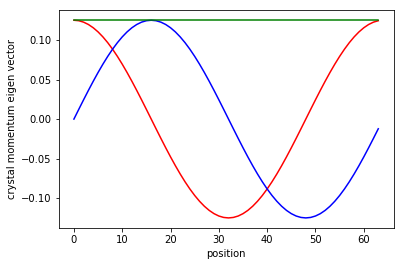

In [53]:
# The eigenvectors are better demonstrated with a latice of longer length
# Here we plot the second and third eigen-vectors(real and imaginary parts) of the first
# 3 eigenvectors of the crystal momentum operator for a 1d lattice with 64 cells
periodic_atom_chain64 = Lattice1d(num_cell=64, boundary = "periodic")
k64 = periodic_atom_chain64.k()
[ks64, pw64] = k64.eigenstates()
plt.plot(np.real(pw64[1]),'r')
plt.plot(np.imag(pw64[1]),'b')
plt.plot(np.abs(pw64[1]),'g')
plt.xlabel('position')
plt.ylabel('crystal momentum eigen vector')
plt.show()
plt.close()

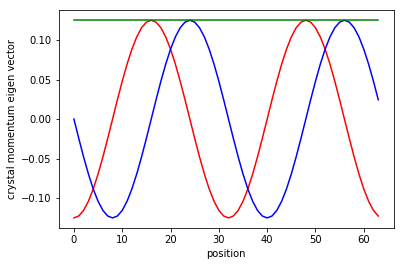

In [54]:
k64 = periodic_atom_chain64.k()
[ks64, pw64] = k64.eigenstates()
plt.plot(np.real(pw64[2]),'r')
plt.plot(np.imag(pw64[2]),'b')
plt.plot(np.abs(pw64[2]),'g')
plt.xlabel('position')
plt.ylabel('crystal momentum eigen vector')
plt.show()
plt.close()

## Relationship of crystal momentum eigen-vectors with the Hamiltonian

In [55]:
Hamt8 = periodic_atom_chain8.Hamiltonian()

In [56]:
pw8_M = np.array([pw8[0].full(),pw8[1].full(),pw8[2].full(),pw8[3].full(),
       pw8[4].full(),pw8[5].full(),pw8[6].full(),pw8[7].full()])
pw8_M = np.squeeze(pw8_M, axis=2)  # changing shape from (8,8,1) to (8,8)
     # pw8_M is a matrix of 8 columns, each of which are the eigenvectors
     # of the crystal momentum operator
pw8_M = Qobj(pw8_M)

In [57]:
pw8_M * Hamt8 * pw8_M.dag()

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[-2.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.         -1.41421356  0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          1.41421356  0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          2.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          1.41421356
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         -1.41421356]]

So, eigenvectors of the crystal momentum are eigenvectors of the Hamiltonian as 
well. This is a consequence of the translational symmetry of the lattice. The generator of the lattice translational operator is the crystal momentum operator. Due to the translational symmetry, the lattice translational operator, the crystal momentum and the Hamiltonian all commute with each other. So they can have simultaneous eigenstates.

In [58]:
# A check that the Hamiltonian and the crystal momentum operator do indeed commute
Hamt8 * k8 - k8 * Hamt8

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

## Relationship of Expansion in momentum eigenkets to fft

We form a Gaussian state in the position basis and evaluate its Discrete Fourier Transform(DFT) for evaluating its frequency components.

In [112]:
xs8 = np.arange(0,8)
Gaussian8_sum_to_1 = 1/np.sqrt(2*np.pi* 0.5 **2) * np.exp(-(xs8 - 3)**2/2/0.5**2)
Gaussian_state8 = np.sqrt(Gaussian8_sum_to_1) # A normalized Gaussian state

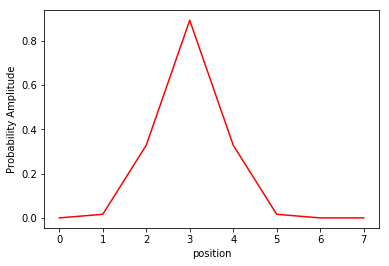

In [113]:
plt.plot(Gaussian_state8,'r')
plt.xlabel('position')
plt.ylabel('Probability Amplitude')
plt.show()
plt.close()

### Inner Product of crystal momentum eigenket and a state

In [115]:
k_exps = pw8_M.dag() * Gaussian_state  # ket vector of inner products with crystal
                                       # momentum eigenkets
k_exps = k_exps/ np.sqrt( np.sum(np.multiply(k_exps, np.conj(k_exps)))) # normalization

### fft spectrum

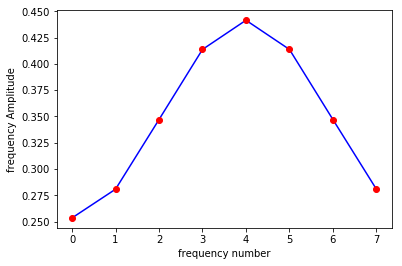

In [116]:
dft_Gaussian_state = np.fft.fft(Gaussian_state)
shf_dft_Gaussian_state = np.roll(dft_Gaussian_state,4)
sq_dft_Gaussian_state = np.multiply(shf_dft_Gaussian_state, np.conj(shf_dft_Gaussian_state))
norml_dft_Gaussian_state = shf_dft_Gaussian_state / np.sqrt(np.sum(sq_dft_Gaussian_state))

#### Comparison

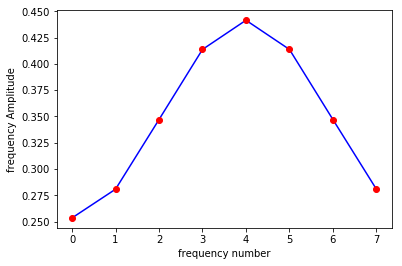

In [118]:
plt.plot(np.abs(norml_dft_Gaussian_state),'b')
plt.plot(np.abs(k_exps),'ro')
plt.xlabel('frequency number')
plt.ylabel('frequency Amplitude')
plt.show()
plt.close()

Therefore, expanding a state in momentum eigenkets is equivalent of a DFT for a periodic lattice.

In [119]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Original developers: R. J. Johansson & P. D. Nation.
Current admin team: Alexander Pitchford, Paul D. Nation, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, and Eric Giguère.
Project Manager: Franco Nori.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.5.0.dev0+c8074e5
Numpy Version:      1.15.2
Scipy Version:      1.1.0
Cython Version:     0.28.5
Matplotlib Version: 3.0.0
Python Version:     3.5.4
Number of CPUs:     2
BLAS Info:          INTEL MKL
OPENMP Installed:   True
INTEL MKL Ext:      True
Platform Info:      Linux (x86_64)
Installation path:  /home/ssaumya7/Desktop/GSOC/Aug5/qutip/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`


In [120]:
qutip.cite()

@article{qutip2,
doi = {10.1016/j.cpc.2012.11.019},
url = {https://doi.org/10.1016/j.cpc.2012.11.019},
year  = {2013},
month = {apr},
publisher = {Elsevier {BV}},
volume = {184},
number = {4},
pages = {1234--1240},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP} 2: A {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
@article{qutip1,
doi = {10.1016/j.cpc.2012.02.021},
url = {https://doi.org/10.1016/j.cpc.2012.02.021},
year  = {2012},
month = {aug},
publisher = {Elsevier {BV}},
volume = {183},
number = {8},
pages = {1760--1772},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP}: An open-source {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
